In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df=df.drop(columns='Id')

In [4]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
#null values detection
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
#duplicates detection
df.duplicated().sum()

3

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(147, 5)

# Data Preparation

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le=LabelEncoder()

In [12]:
y=le.fit_transform(df['Species'])
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
x=df.drop(columns='Species')

In [14]:
from sklearn.model_selection import train_test_split,cross_val_score,KFold,GridSearchCV

In [117]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [118]:
from sklearn.tree import DecisionTreeClassifier

In [119]:
dt=DecisionTreeClassifier(random_state=0)
kf=KFold(n_splits=3,shuffle=True,random_state=0)
score=cross_val_score(dt,x_train,y_train,cv=kf,scoring='f1_weighted')
print(score)
print('bias error',1-np.mean(score))
print('variance error',np.std(score))

[0.9490232  0.8974359  0.94871795]
bias error 0.06827431827431829
variance error 0.024246859238771033


In [120]:
dt=DecisionTreeClassifier(random_state=0)
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [121]:
train_pred=dt.predict(x_train)
test_pred=dt.predict(x_test)

In [122]:
from sklearn.metrics import classification_report

In [123]:
print('classification report train\n',classification_report(y_train,train_pred))
print('classification report test\n',classification_report(y_test,test_pred))

classification report train
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        40

    accuracy                           1.00       117
   macro avg       1.00      1.00      1.00       117
weighted avg       1.00      1.00      1.00       117

classification report test
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [23]:
#from classification report we can see model is giving 100% accuracy in train,but in test the accuracy 100%
 

Regularized decision tree

In [124]:
params={'max_depth':np.arange(1,10),'criterion':['gini','entropy'],'min_samples_split':np.arange(2,20)}
dt_tune=DecisionTreeClassifier(random_state=0)
kf=KFold(n_splits=3,shuffle=True,random_state=0)
gs=GridSearchCV(estimator=dt_tune,param_grid=params,cv=kf,scoring='f1_weighted')
gs.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])},
             scoring='f1_weighted')

In [125]:
gs.best_params_

{'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2}

In [126]:
dt_reg=DecisionTreeClassifier(criterion='gini',max_depth=2,min_samples_split=2,random_state=0)
kf=KFold(n_splits=3,shuffle=True,random_state=0)
score=cross_val_score(dt_reg,x_train,y_train,cv=kf,scoring='f1_weighted')
print(score)
print('bias error',1-np.mean(score))
print('variance error',np.std(score))

[0.97416204 0.92264538 0.94871795]
bias error 0.05149154518018462
variance error 0.021032110715989392


In [127]:
dt_reg=DecisionTreeClassifier(criterion='gini',max_depth=2,min_samples_split=2,random_state=10)
dt_reg.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=10)

In [128]:
train_pred1=dt_reg.predict(x_train)
test_pred1=dt_reg.predict(x_test)

In [129]:
print('classification report train\n',classification_report(y_train,train_pred1))
print('classification report test\n',classification_report(y_test,test_pred1))

classification report train
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.97      0.94        40
           2       0.97      0.90      0.94        40

    accuracy                           0.96       117
   macro avg       0.96      0.96      0.96       117
weighted avg       0.96      0.96      0.96       117

classification report test
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.91      1.00      0.95        10
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [32]:
#model overfitt is removed as we can see the train and test accuracy are 97%

In [ ]:
#before production we have to expose our entire dataset to model

In [130]:
dt_reg=DecisionTreeClassifier(criterion='gini',max_depth=2,min_samples_split=2,random_state=0)
dt_reg.fit(x,y)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [131]:
 from sklearn.tree import plot_tree

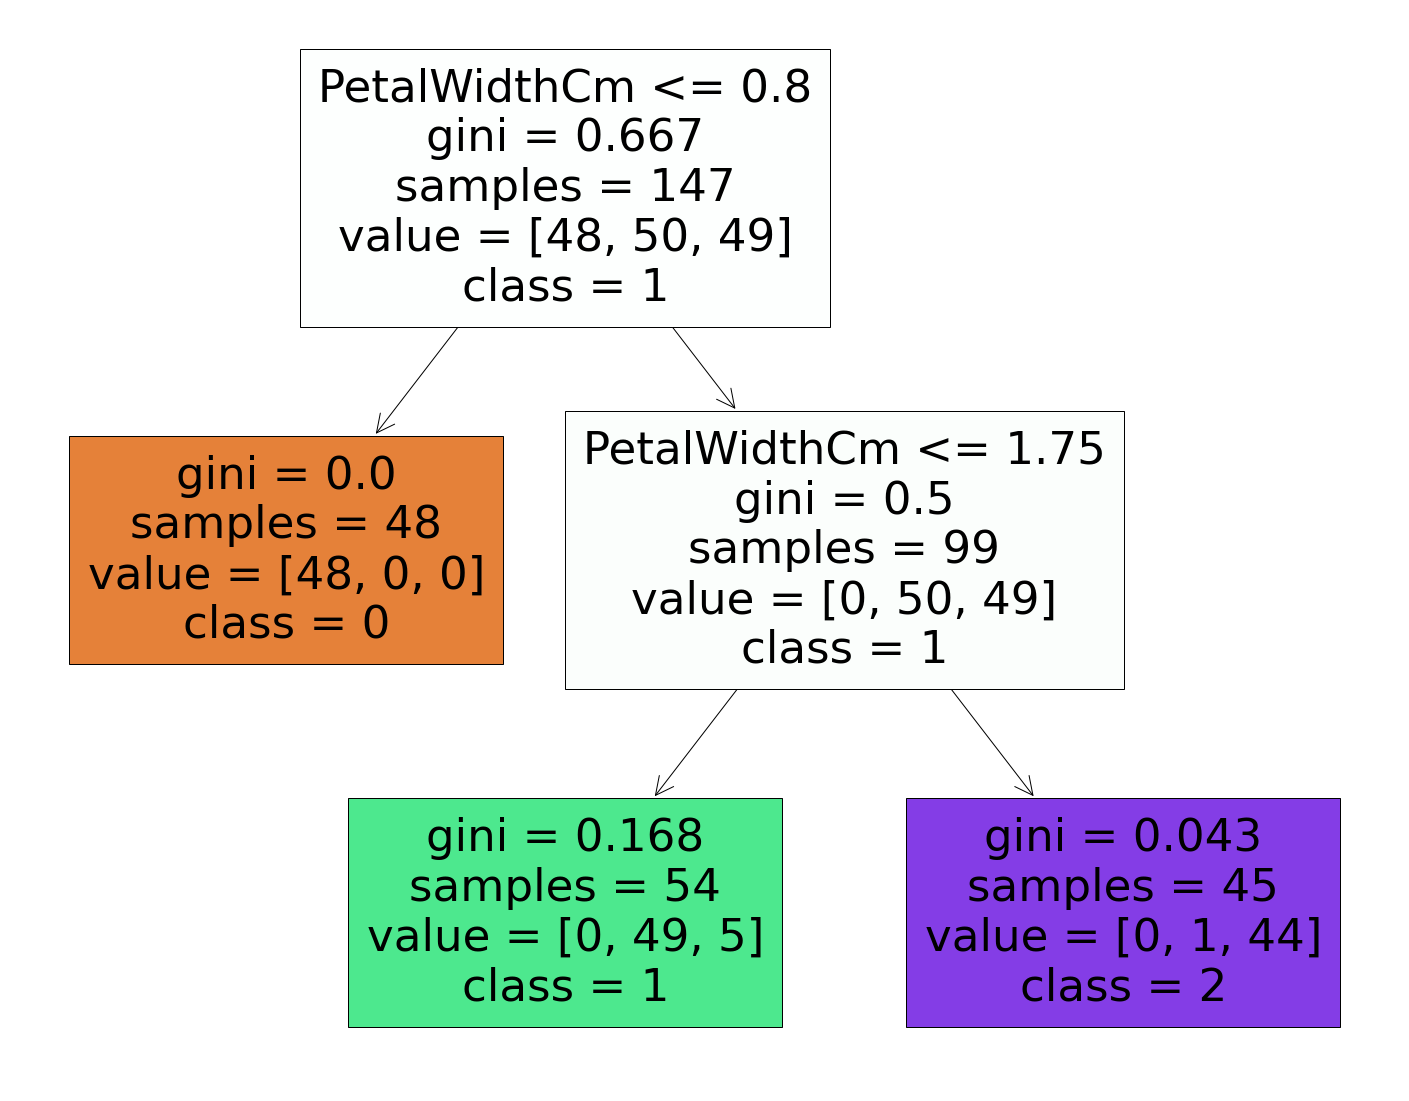

In [132]:
plt.figure(figsize=(25,20))
plot_tree(dt_reg,feature_names=x.columns,class_names=['0','1','2'],filled=True)
plt.show()